<a href="https://colab.research.google.com/github/ojasvinaik13/GRIP/blob/main/Prediction_Using_SupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction using Supervised Machine Learning
### Ojasvi Naik

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Analysing dataset


In [3]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Plotting data

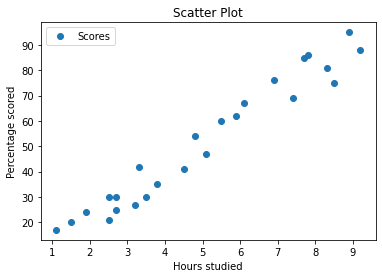

In [7]:
dataset.plot(x="Hours", y="Scores", style="o")
plt.title("Scatter Plot")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show()

Divide data into inputs and labels

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

Divide dataset into training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Training using Simple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting regression line

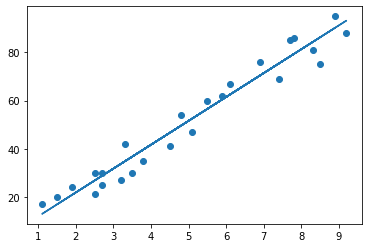

In [11]:
line = regressor.coef_*X + regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

Making predictions on test data

In [12]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing Actual and Predictions

In [14]:
data = pd.DataFrame({'Actual':y_test, 'Prediction':y_pred})
data

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing on my own data

In [17]:
hours = 4
score = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score[0]))

No of Hours = 4
Predicted Score = 41.66078596400362


Evaluating the model

In [18]:
from sklearn import metrics
print("Mean Absolute error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root mean square error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute error:  4.183859899002982
Mean Squared error:  21.598769307217456
Root mean square error:  4.647447612100373
